**Part 3: Stochastic Gradient Descent**



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from scipy.linalg import norm

In [27]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df1=pd.read_csv('sample_data/california_housing_test.csv')


In [64]:
y = df['median_income'].values
A=df.drop(['median_income'],axis =1).values

In [65]:

A=A[:200]
y=y[:200]

mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
m = y.mean()
y = y-m
n,p=A.shape


In [5]:
class RegPb(object):
    '''                                                                   
        A class for regression problems with linear models.
        
        Attributes:
            A: Data matrix (features)
            y: Data vector (labels)
            n,d: Dimensions of A
            loss: Loss function to be considered in the regression
                'l2': Least-squares loss
                'logit': Logistic loss
            lbda: Regularization parameter
    '''
   
    # Instantiate the class
    def __init__(self, A, y,lbda=0):
        self.A = A
        self.y = y
        self.n, self.p = A.shape
       
        self.lbda = lbda
        
    
    # Objective value
    def f(self, x):
      return np.linalg.norm(self.A.dot(x) - self.y) ** 2 / (2. ) + self.lbda * norm(x) ** 2 / 2.
       
    # Partial objective value
    def f_i(self, i, x):
       
      return np.linalg.norm(self.A[i].dot(x) - self.y[i]) ** 2 / (2.) + self.lbda * norm(x) ** 2 / 2.
 
    
    # Full gradient computation
    def grad(self, x):
        
    
        return self.A.T.dot(self.A.dot(x) - self.y)  + self.lbda * x
       
    
    # Partial gradient
    def grad_i(self,i,x):
        a_i = self.A[i]
        
        
        return (a_i.dot(x) - self.y[i]) * a_i + self.lbda*x
      
    def fl1(self,x):
        return self.f(x)+norm(x,ord=1)

    # maximum learning rate  for the gradient
    def tau(self):
        C = A.transpose().dot(A)
        L = norm(C+self.lbda*np.eye(self.p), ord=2) ** 2  
       
        return 1/L
    # optimal learning rate
    def tau_opt(self):
      C = A.transpose().dot(A)
      tau= 2/( norm(C+self.lbda*np.eye(self.p), ord=2) ** 2+ norm(C+self.lbda*np.eye(self.p), ord=-2) ** 2)
      return tau

In [30]:
# Stochastic gradient implementation
def stochasticgradientdescnet(prob,x0,xtarget,tau,step0=1, n_iter=1000,nb=1,with_replace=False,GD=False): 
   
    # Initial step: Compute and plot some initial quantities

    # objective history
    objvals = []
    
    # iterates distance to the minimum history
    
    with_replace=False
    # Lipschitz constant
    L = norm(A,ord=2)**2
    
    # Number of samples
    n = 200
    
    # Initial value of current iterate  
    x = x0.copy()
   

    # Initialize iteration counter
    k=0
    
    # Current objective
    obj = prob.f(x)
    objvals.append(obj);
    # Current distance to the optimum
    
    
    
  
    # Main loop
    while (k < n_iter):
        # Draw the batch indices
        ik = np.random.choice(200,nb,replace=with_replace)# Batch gradient
        
        # Stochastic gradient calculation
        
        sg = np.zeros(p)
        for j in range(nb):
            gi = prob.grad_i(ik[j],x)
            sg = sg + gi
        sg = (1/nb)*sg
        
        
        if tau >0:
            x = x - tau * sg
        else:
            sk = float(step0/((k+1)**0.5))
            
            x = x - sk * sg
        
      
        
        obj =prob.f(x)
       
        
        k += 1
        # Plot quantities of interest at the end of every epoch only
        if (k*nb) % n == 0:
            objvals.append(obj)
            
    
    # Plot quantities of interest for the last iterate (if needed)
    if (k*nb) % 1000 > 0:
        objvals.append(obj)
        
              
    
    # Outputs
    x_output = x
    
    return x_output, np.array(objvals), 

In [31]:
def gradientdescent(prob,x0,iter,tau): ## 
  
  s=x0
  L=[]
  val=0
  for i in range(iter):
    
    
    g=prob.grad(s)
    
    s=s - tau*g
    
    val=prob.f(s)
    L.append(val)
  return np.array(L),s

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Comparisons of stochastic gradient descent and gradient descent')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'error in log scale')

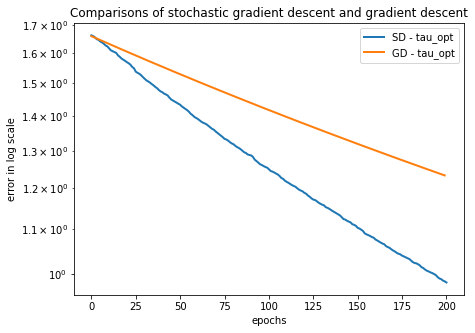

In [72]:
n_epochs=200
lbda=0
prob=RegPb(A,y,lbda)
x0=np.zeros(p)
x_min = np.linalg.solve( A.transpose().dot(A)+lbda*np.eye(p), A.transpose().dot(y) )
f_min=prob.f(x_min)
tau_opt=prob.tau_opt()
nb=1

R=stochasticgradientdescnet(prob,x0,x_min,tau_opt*2,0.2,200*n_epochs/1,1)[1]
L=gradientdescent(prob,x0,n_epochs,tau_opt)[0]
R1=stochasticgradientdescnet(prob,x0,x_min,tau_opt*2,0.2,int(200*n_epochs/nb),nb)[1]
plt.figure(figsize=(7, 5))
plt.semilogy(R/f_min-1, label="SD - tau_opt", lw=2)

plt.semilogy(L/f_min-1, label="GD - tau_opt", lw=2)
plt.title('Comparisons of stochastic gradient descent and gradient descent')
plt.xlabel('epochs')
plt.ylabel('error in log scale')
plt.legend()
plt.show()

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Comparisons of stochastic gradient descent with different batch sizes')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'error in log scale')

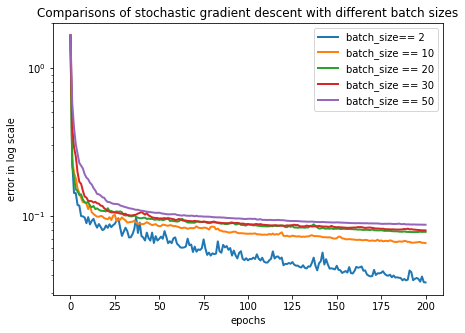

In [82]:
n_epochs=200
lbda=0
prob=RegPb(A,y,lbda)
x0=np.zeros(p)
x_min = np.linalg.solve( A.transpose().dot(A)+lbda*np.eye(p), A.transpose().dot(y) )
f_min=prob.f(x_min)
tau_opt=prob.tau_opt()
nb=1

R=stochasticgradientdescnet(prob,x0,x_min,0,0.2,200*n_epochs/2,2)[1]

R1=stochasticgradientdescnet(prob,x0,x_min,0,0.2,int(200*n_epochs/10),10)[1]
R2=stochasticgradientdescnet(prob,x0,x_min,0,0.2,int(200*n_epochs/20),20)[1]
R3=stochasticgradientdescnet(prob,x0,x_min,0,0.2,int(200*n_epochs/25),25)[1]
R4=stochasticgradientdescnet(prob,x0,x_min,0,0.2,int(200*n_epochs/50),50)[1]
plt.figure(figsize=(7, 5))
plt.semilogy(R/f_min-1, label="batch_size== 2", lw=2)

plt.semilogy(R1/f_min-1, label="batch_size == 10", lw=2)
plt.semilogy(R2/f_min-1, label="batch_size == 20", lw=2)
plt.semilogy(R3/f_min-1, label="batch_size == 30", lw=2)
plt.semilogy(R4/f_min-1, label="batch_size == 50", lw=2)
plt.title('Comparisons of stochastic gradient descent with different batch sizes')
plt.xlabel('epochs')
plt.ylabel('error in log scale')
plt.legend()
plt.show()